## Homework 3: Assignment 1
1. GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
2. For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
3. Describe the behavior you see in the plots in terms of the law of large numbers.
4. PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing 
5. Extra Credit: FIT a gaussian to the distribution of means

In [1]:
from __future__ import print_function
__author__= 'Franz Loza'

import pylab as pl
from scipy.optimize import curve_fit, minimize
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Chi Square Distribution

In [2]:
np.random.seed(999)

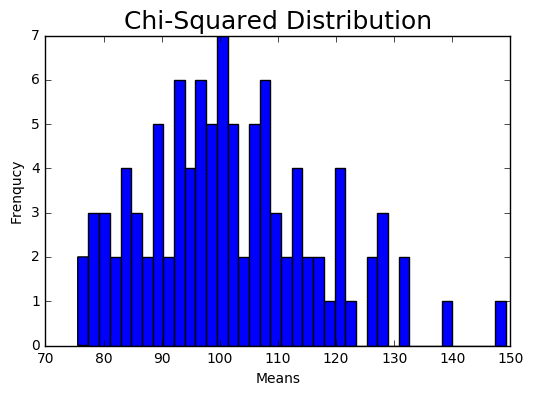

In [3]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']
popMean = 100

# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = popMean

md = {}
# md is an empty dictionary
md['chisq'] = np.random.chisquare(df, size=100)

pl.hist(md['chisq'], bins=40)
pl.ylabel('Frenqucy')
pl.xlabel('Means')
pl.title('Chi-Squared Distribution', fontsize=18)

## Figure C1: Chi-Squared distribution: mean = 100, N = 100

In [4]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.75, standard deviation: 14.94


In [5]:
sizeArray = np.linspace(10, 2000, 100).astype(int)
print (type(sizeArray), sizeArray.shape)

<type 'numpy.ndarray'> (100,)


In [6]:
#redefine 'chisq' list in md dictionary
md['chisq'] = {}
for n in sizeArray:
    md['chisq'][n] = np.random.chisquare(popMean, size = n)

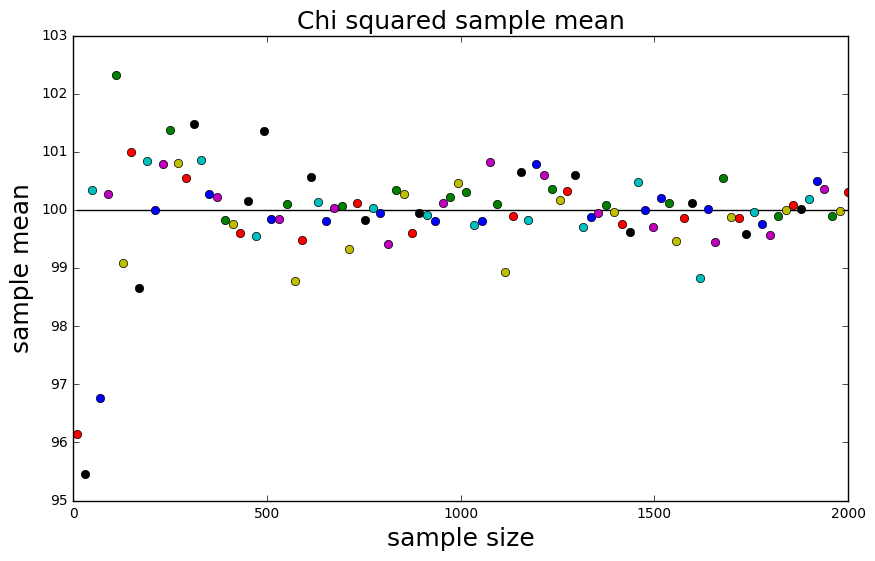

In [7]:
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axchisq_mu_n.set_title('Chi squared sample mean', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [popMean, popMean],'k')


for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)

## Figure C2: Chi-Squared Sample Mean
From the figure we can see the sample mean is getting close to 100, which is the mean of the chi square distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

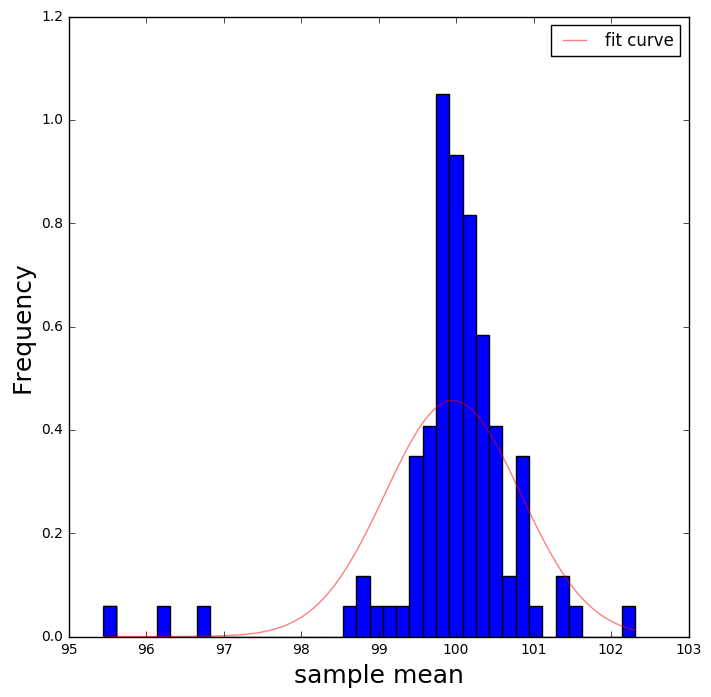

In [8]:
allmeans = list(md['chisq']['means'].values())
c_allmeans = allmeans
#print (allmeans)
pl.figure(figsize=(8, 8))
pl.hist(allmeans, bins=40, normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)

#plt.xlim((min(allmeans), max(allmeans)))
fit_mean = np.mean(allmeans)
fit_var = np.var(allmeans)
fit_std = np.sqrt(fit_var)
x = np.linspace(min(allmeans), max(allmeans),100)
pl.plot(x,mlab.normpdf(x,fit_mean,fit_std), color='red', alpha=0.5)
pl.legend(['fit curve'], loc='best')

## Figure C3: Sample Means Distribution of Chi-Squared
From the distribution figure of sample means, we can see it is closed to a normal distribution. According to the Central Limit Theorem, the distribution of the mean of a large number of independent, identically distributed variables will be approximately normal. We conclude our experiment is in compliance with Central Limit Theorem.

## Normal distribution

In [9]:
md = {}
md['normal'] = np.random.normal(popMean, scale=100, size=100)
md['normal'].mean()

88.387756134249557

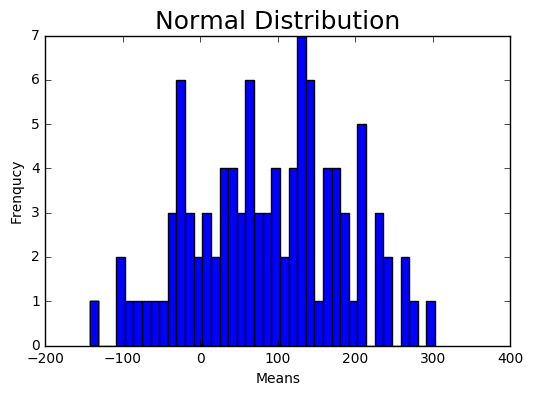

In [11]:
pl.hist(md['normal'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')
pl.ylabel('Frenqucy')
pl.xlabel('Means')
pl.title('Normal Distribution', fontsize=18)

## Figure 1: one sample of Normal distribution: mean=100, scale=100, N=100

In [ ]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['normal'].mean(), md['normal'].std()))

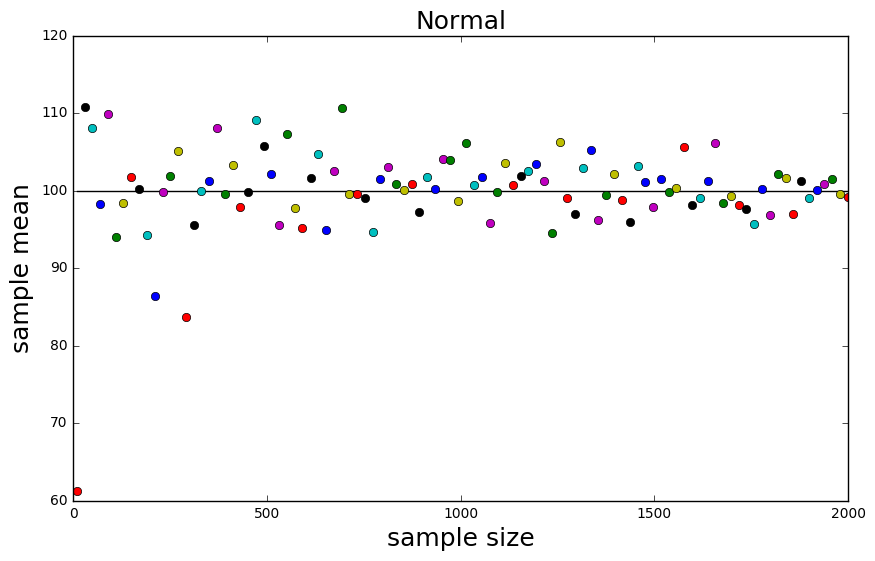

In [12]:

md['normal'] = {} 

for n in sizeArray:
    md['normal'][n] = np.random.normal(popMean, scale = 100, size = n)
       

md['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axchisq_mu_n.set_title('Normal', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [popMean,popMean], 'k')
for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)

## Figure N2: Normal Sample means
From the figure we can see the sample mean is getting close to 100, which is the mean of the normal distribution we set before, as the sample size is getting larger. It is in compliance with the law of large numbers.

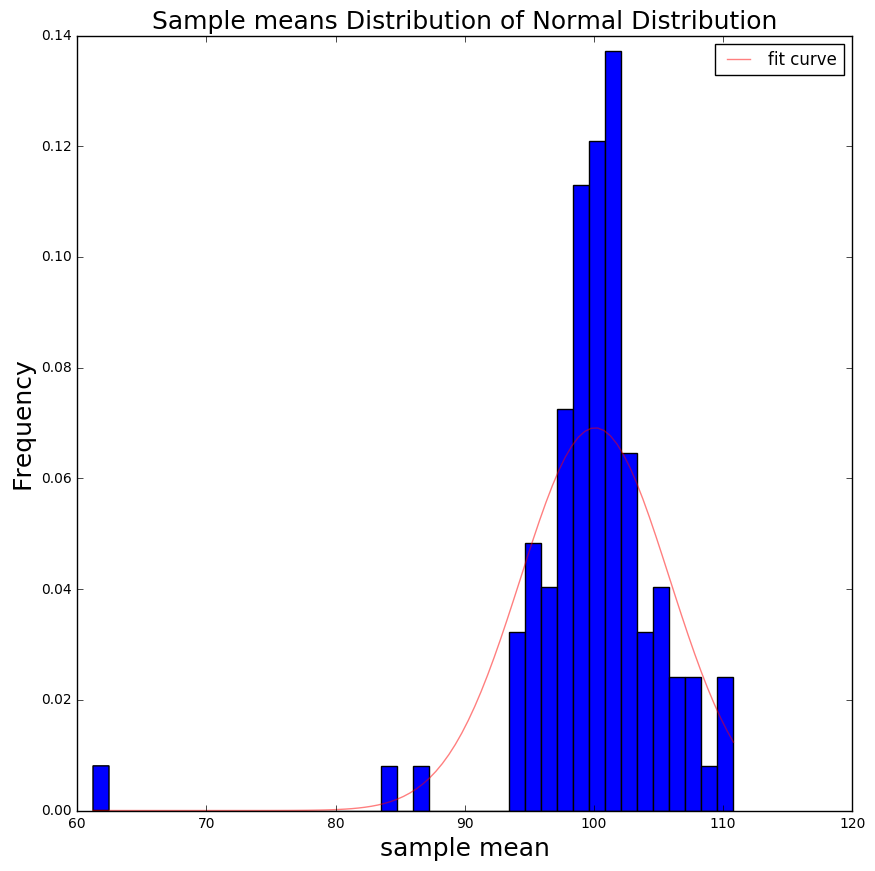

In [13]:
allmeans = list(md['normal']['means'].values())
n_allmeans = allmeans

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40, normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means Distribution of Normal Distribution', fontsize=18)

fit_mean = np.mean(allmeans)
fit_var = np.var(allmeans)
fit_std = np.sqrt(fit_var)
x = np.linspace(min(allmeans), max(allmeans),100)
pl.plot(x,mlab.normpdf(x,fit_mean,fit_std), color='red', alpha=0.5)
pl.legend(['fit curve'], loc='best')

## Poisson distribution

In [14]:
lam = popMean
# In poisson distribution, the lam equals to the mean!
md = {}
md['poisson'] = np.random.poisson(lam, size=100)

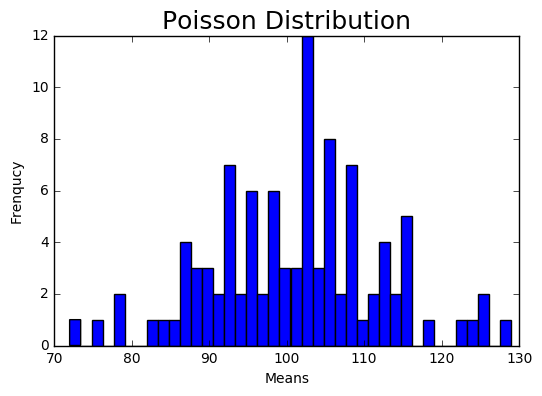

In [15]:

pl.hist(md['poisson'], bins = 40)

pl.ylabel('Frenqucy')
pl.xlabel('Means')
pl.title('Poisson Distribution', fontsize=18)

## Figure P1: Poisson distribution: lam=100, N=100

In [16]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poisson'].mean(), md['poisson'].std()))

Poisson mean: 101.07, standard deviation: 10.98


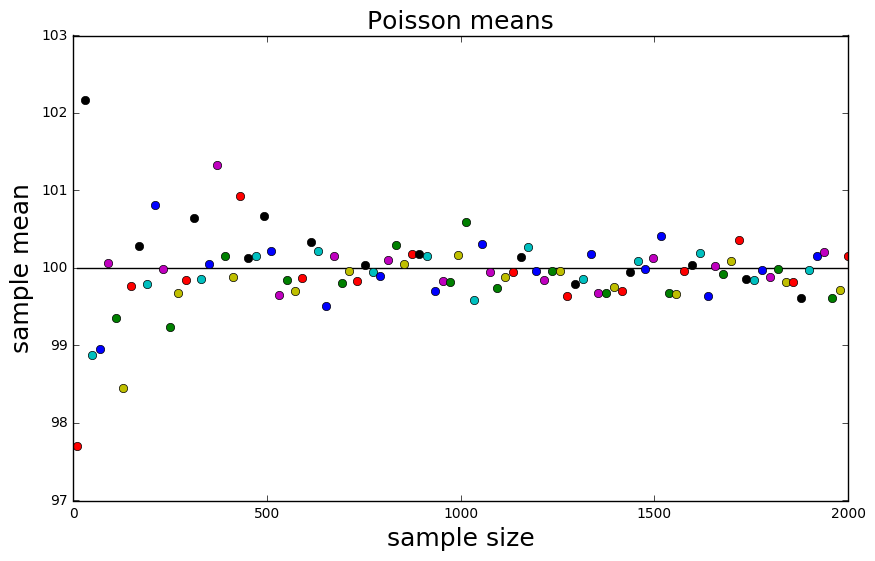

In [17]:
md['poisson'] = {} 

for n in sizeArray:
    md['poisson'][n] = np.random.poisson(lam, size = n)
       

md['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axchisq_mu_n.set_title('Poisson means', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [lam,lam], 'k')
for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)

## Figure P2: Poisson Sample means
From the figure we can see the sample mean is getting close to 100, which is the mean of the poisson distribution we set before, as the sample size getting larger. It is in compliance with the law of large numbers.

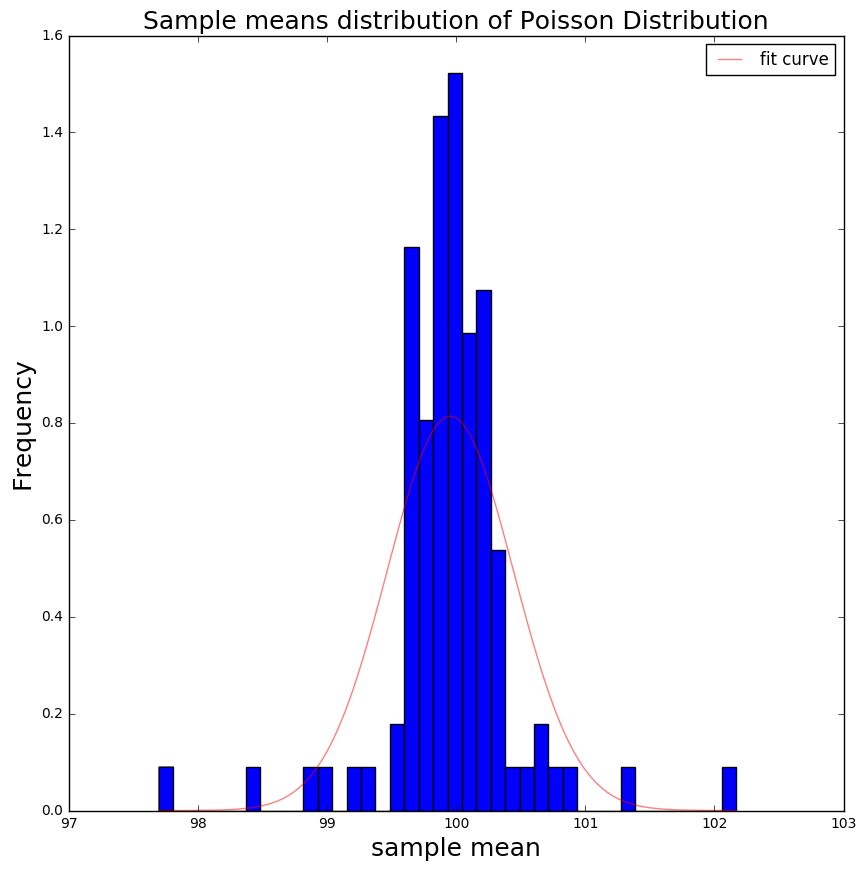

In [18]:
allmeans = list(md['poisson']['means'].values())
p_allmeans = allmeans

pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins=40, normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means distribution of Poisson Distribution', fontsize=18)

fit_mean = np.mean(allmeans)
fit_var = np.var(allmeans)
fit_std = np.sqrt(fit_var)
x = np.linspace(min(allmeans), max(allmeans),100)
pl.plot(x,mlab.normpdf(x,fit_mean,fit_std), color='red', alpha=0.5)
pl.legend(['fit curve'], loc='best')

## Figure P3: Sample means distribution of Poisson Distribution
From the distribution figure of sample means, we can see it is closed to a normal distribution. According to the Central Limit Theorem, the distribution of the mean of a large number of independent, identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## Binomial distribution

In [20]:
n = 1000
p = 0.1
# In binomial distribution, the result of n*p equals to the mean!
md = {}
md['binomial'] = np.random.binomial(n, p, size=100)

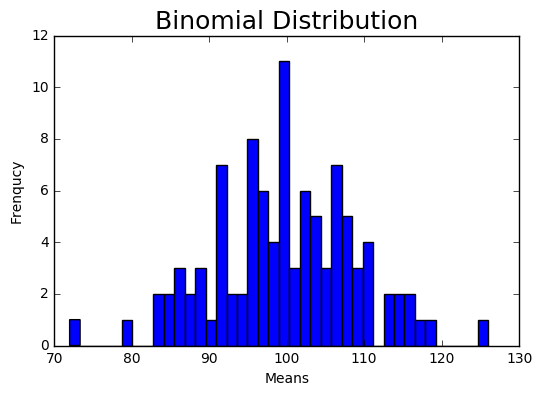

In [21]:
pl.hist(md['binomial'], bins = 40)
pl.ylabel('Frenqucy')
pl.xlabel('Means')
pl.title('Binomial Distribution', fontsize=18)

## Figure B1: Binormal distribution: n=1000, p=0.1, N=100

In [22]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.84, standard deviation: 9.24


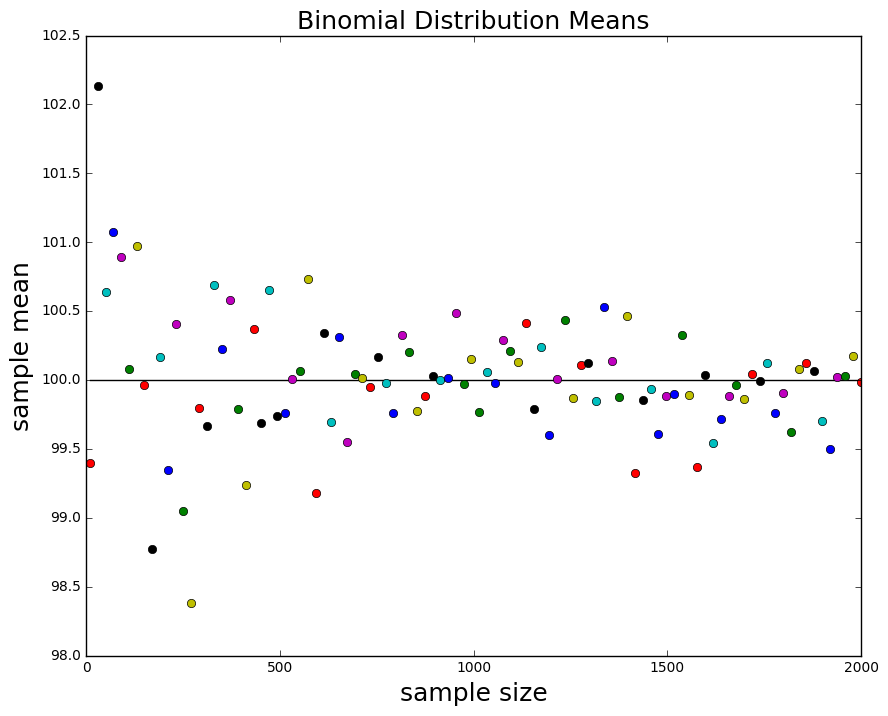

In [23]:
md['binomial'] = {} 

for x in sizeArray:
    md['binomial'][x] = np.random.binomial(n, p, size = x)
       

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)
axchisq_mu_n.set_title('Binomial Distribution Means', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [n*p,n*p], 'k')
for xx in md['binomial']:
    if not type(xx) == str:
        md['binomial']['means'][xx] = md['binomial'][xx].mean()
        
        axchisq_mu_n.plot(xx, md['binomial']['means'][xx], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)

## Figure B2: Sample means of Binomial distribution
from the figure we can see the sample mean is getting close to 100, which is the mean of the poisson distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

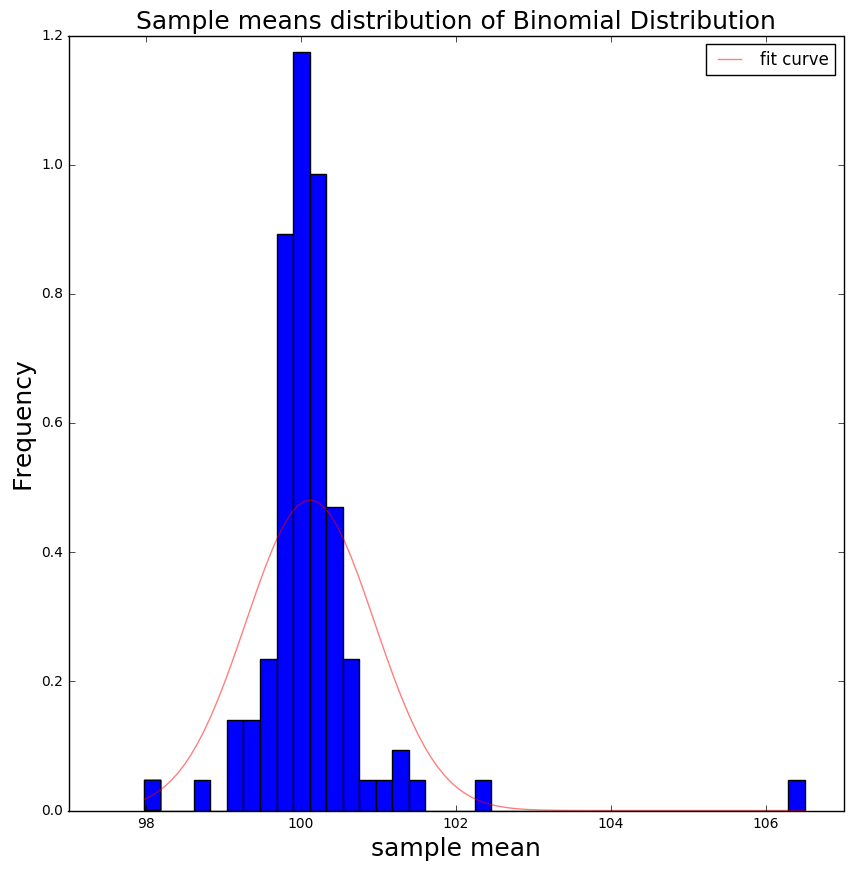

In [26]:
allmeans = list(md['binomial']['means'].values())
b_allmeans = allmeans

pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins=40, normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means distribution of Binomial Distribution', fontsize=18)

fit_mean = np.mean(allmeans)
fit_var = np.var(allmeans)
fit_std = np.sqrt(fit_var)
x = np.linspace(min(allmeans), max(allmeans),100)
pl.plot(x,mlab.normpdf(x,fit_mean,fit_std), color='red', alpha=0.5)
pl.legend(['fit curve'], loc='best')

## Figure B3: Sample means distribution of Binomial Distribution
From the distribution figure of sample means, we can see it is closed to a normal distribution. According to the Central Limit Theorem, the distribution of the mean of a large number of independent, identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## Exponential Distribution

In [27]:
scale=100
md = {}
md['exponential'] = np.random.exponential(scale, size=100)

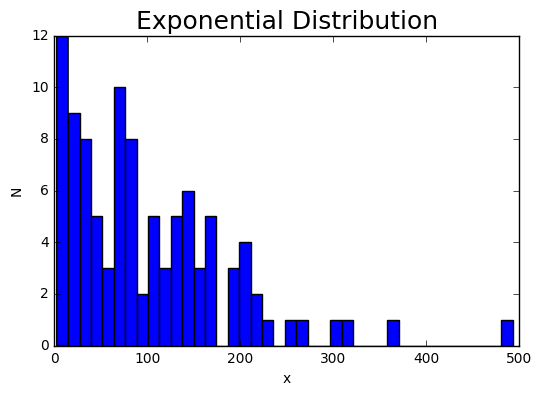

In [28]:
pl.hist(md['exponential'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Exponential Distribution', fontsize=18)

In [29]:
print ("Exponential mean: %.2f, standard deviation: %.2f"%(md['exponential'].mean(), md['exponential'].std()))

Exponential mean: 103.04, standard deviation: 86.84


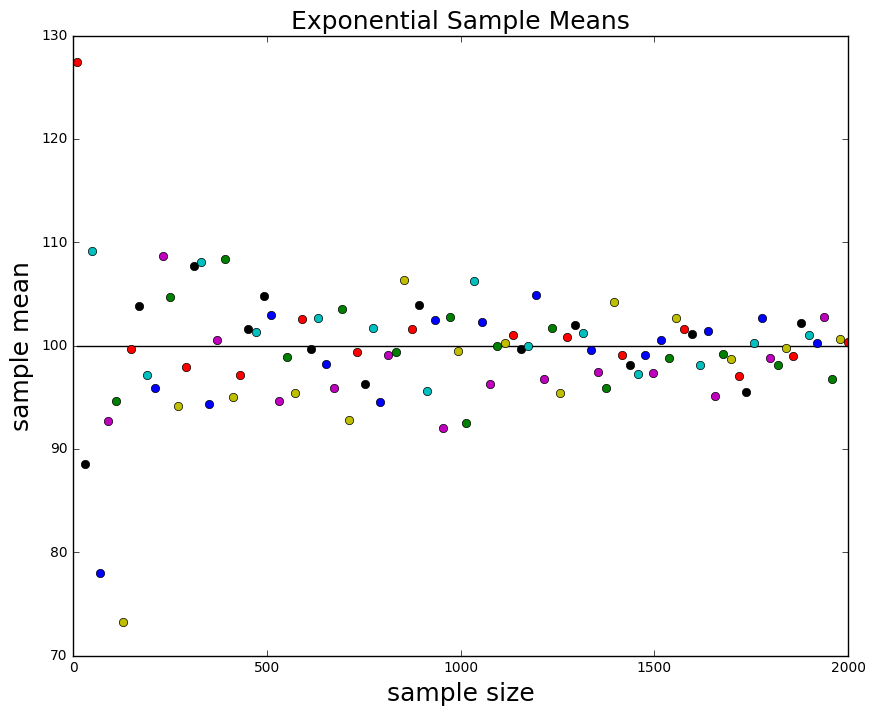

In [30]:
md['exponential'] = {} 

for x in sizeArray:
    md['exponential'][x] = np.random.exponential(scale, size = x)
       

md['exponential']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)
axchisq_mu_n.set_title('Exponential Sample Means', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [scale,scale], 'k')
for xx in md['exponential']:
    if not type(xx) == str:
        md['exponential']['means'][xx] = md['exponential'][xx].mean()
        axchisq_mu_n.plot(xx, md['exponential']['means'][xx], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)

## Figure E2: Sample means of Exponential Distribution
From the figure we can see the sample mean is getting close to 100, which is the mean of the poisson distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

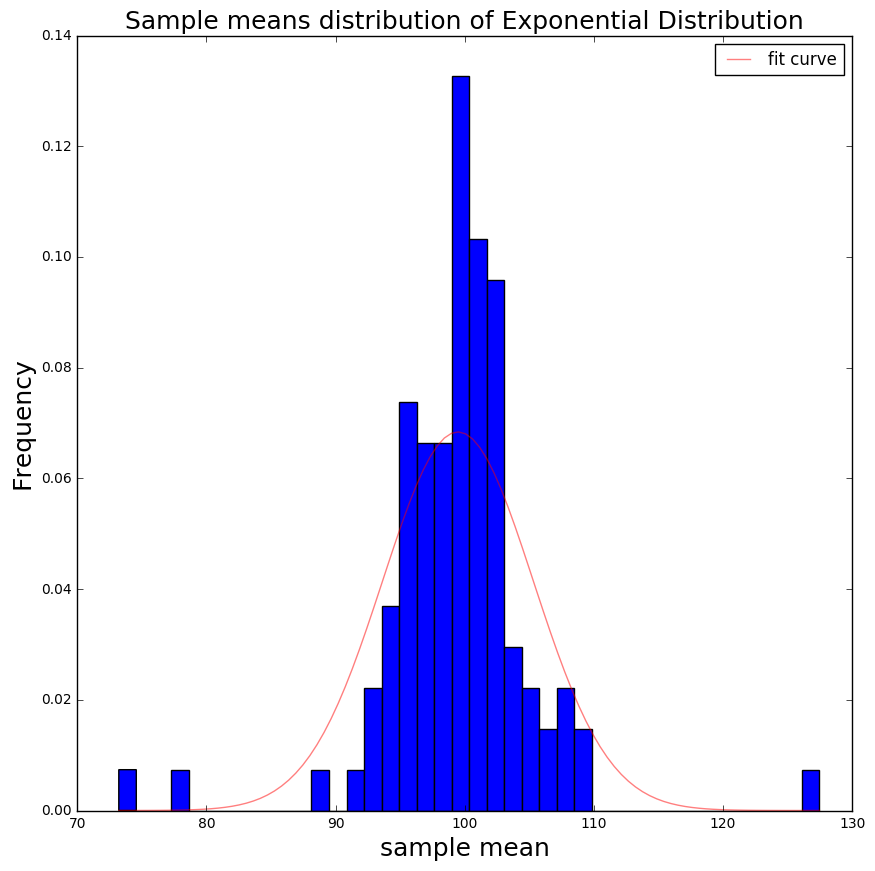

In [31]:
allmeans = list(md['exponential']['means'].values())
e_allmeans = allmeans

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40, normed=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means distribution of Exponential Distribution', fontsize=18)

fit_mean = np.mean(allmeans)
fit_var = np.var(allmeans)
fit_std = np.sqrt(fit_var)
x = np.linspace(min(allmeans), max(allmeans),100)
pl.plot(x,mlab.normpdf(x,fit_mean,fit_std), color='red', alpha=0.5)
pl.legend(['fit curve'], loc='best')

## Figure E3: Sample means distribution of Exponential Distribution
From the distribution figure of sample means, we can see it is closed to a normal distribution. According to the Central Limit Theorem, the distribution of the mean of a large number of independent, identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

In [32]:
Allmeans = c_allmeans + n_allmeans + p_allmeans + b_allmeans + e_allmeans

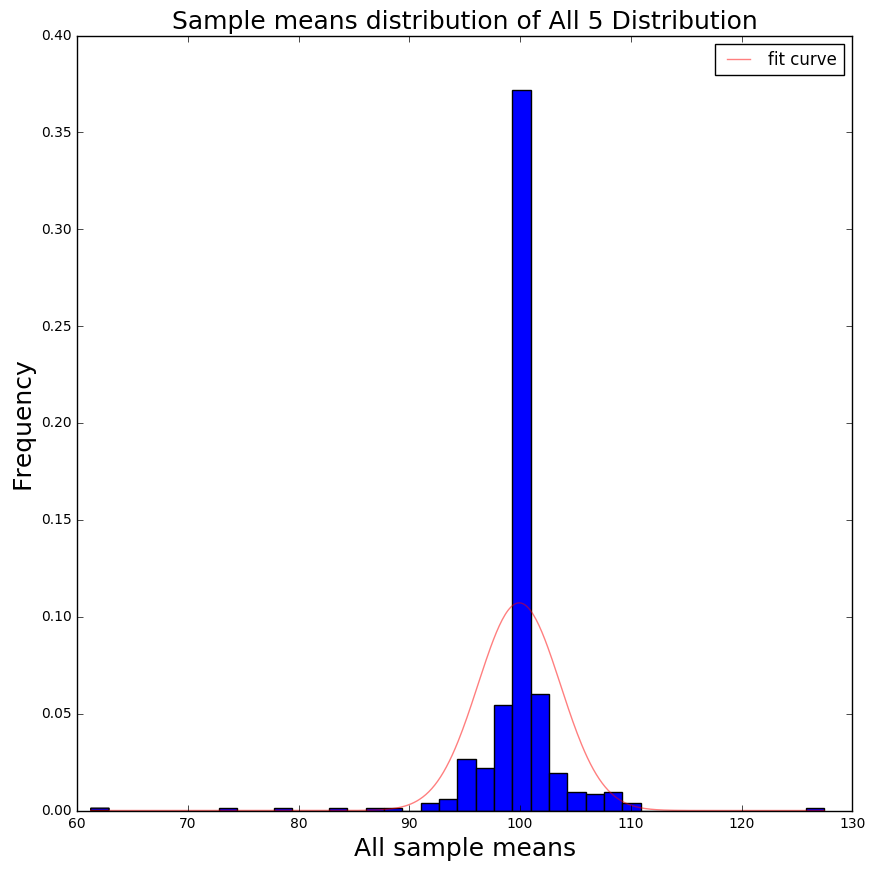

In [34]:
pl.figure(figsize=(10, 10))
pl.hist(Allmeans,bins=40, normed=True)
pl.xlabel('All sample means', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means distribution of All 5 Distribution', fontsize=18)

fit_mean = np.mean(Allmeans)
fit_var = np.var(Allmeans)
fit_std = np.sqrt(fit_var)
x = np.linspace(min(Allmeans), max(Allmeans),500)
pl.plot(x,mlab.normpdf(x,fit_mean,fit_std), color='red', alpha=0.5)
pl.legend(['fit curve'], loc='best')

## Figure A: Sample means distribution of All 5 Distribution
As Central Limit Theorem states, the distribution of different sample means converges to a gaussian normal distribution as the sample size increase.

Fitting curve resource:
http://stackoverflow.com/questions/23447262/fitting-a-gaussian-to-a-histogram-with-matplotlib-and-numpy-wrong-y-scaling
